# Optimize marketing expenses-Yandex.Afisha <a id='back'></a>   

# Table of contents  
1.[Introduction](#intro)  
2.[Steps](#steps)  
3.[Data Preprocessing](#data_prep)    
4.[Conclusion](#end)  


# Introduction.
    With the Server logs with data on Yandex.Afisha visits from June 2017 through May 2018 ,  
    Dump file with all orders for the period and Marketing expenses statistics , our task is   
    to optimize marketing expenses.


<a id='steps'></a>

## Steps:
    1.How people use the product  
    2.When they start to buy  
    3.How much money each customer brings
    4.When they pay off




In [414]:
#importing all the packages
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

***Download all the datasets***  

In [415]:
warnings.filterwarnings("ignore")

In [416]:
visits_df=pd.read_csv('visits_log_us.csv')

In [417]:
orders_df=pd.read_csv('orders_log_us.csv')

In [418]:
costs_df=pd.read_csv('costs_us.csv')

In [419]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  359400 non-null  int64 
 1   Device      359400 non-null  object
 2   End Ts      359400 non-null  object
 3   Source Id   359400 non-null  int64 
 4   Start Ts    359400 non-null  object
 5   Uid         359400 non-null  uint64
dtypes: int64(2), object(3), uint64(1)
memory usage: 16.5+ MB


<a id='data_prep'></a>

# Data Preprocessing.

***Renaming all the columns throughout with small letters and space replaced with _ for uniformity.***

In [420]:
visits_df=visits_df.rename(columns=
                          {
                            'Device':'device',
                            'Uid':'uid',
                           'End Ts':'end_ts',
                           'Source Id':'source_id',
                           'Start Ts':'start_ts'})

In [421]:
visits_df.head()

,Unnamed: 0,device,end_ts,source_id,start_ts,uid
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [422]:
visits_df.duplicated().sum()

0

In [423]:
visits_df['uid'].nunique()

228169

In [424]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50415 non-null  int64  
 1   Buy Ts      50415 non-null  object 
 2   Revenue     50415 non-null  float64
 3   Uid         50415 non-null  uint64 
dtypes: float64(1), int64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [425]:
orders_df=orders_df.rename(columns=
                          {
                            'Uid':'uid',
                           'Revenue':'revenue',
                           'Buy Ts':'buy_ts'})

In [426]:
orders_df.head()

,Unnamed: 0,buy_ts,revenue,uid
0,0,2017-06-01 00:10:00,17.00,10329302124590727494
1,1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2,2017-06-01 00:27:00,0.37,17903680561304213844
3,3,2017-06-01 00:29:00,0.55,16109239769442553005
4,4,2017-06-01 07:58:00,0.37,14200605875248379450


In [427]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2542 non-null   int64  
 1   source_id   2542 non-null   int64  
 2   dt          2542 non-null   object 
 3   costs       2542 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 79.6+ KB


In [428]:
costs_df.head()

,Unnamed: 0,source_id,dt,costs
0,0,1,2017-06-01,75.20
1,1,1,2017-06-02,62.25
2,2,1,2017-06-03,36.53
3,3,1,2017-06-04,55.00
4,4,1,2017-06-05,57.08


In [429]:
costs_df.duplicated().sum()

0

***Change datatypes***

'device' and 'source_id' of 'visits_df' and 'source_id' of 'costs_df' changed to category datatype as their values represents  categories.  
All the datetime in all datasets changed to datetime64 datatype..

In [430]:
visits_df['device']=visits_df['device'].astype('category')

In [431]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  359400 non-null  int64   
 1   device      359400 non-null  category
 2   end_ts      359400 non-null  object  
 3   source_id   359400 non-null  int64   
 4   start_ts    359400 non-null  object  
 5   uid         359400 non-null  uint64  
dtypes: category(1), int64(2), object(2), uint64(1)
memory usage: 14.1+ MB


In [432]:
visits_df['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6], dtype=int64)

In [433]:
visits_df['source_id']=visits_df['source_id'].astype('category')

In [434]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  359400 non-null  int64   
 1   device      359400 non-null  category
 2   end_ts      359400 non-null  object  
 3   source_id   359400 non-null  category
 4   start_ts    359400 non-null  object  
 5   uid         359400 non-null  uint64  
dtypes: category(2), int64(1), object(2), uint64(1)
memory usage: 11.7+ MB


In [435]:
visits_df['start_ts']

0         2017-12-20 17:20:00
1         2018-02-19 16:53:00
2         2017-07-01 01:54:00
3         2018-05-20 10:59:00
4         2017-12-27 14:06:00
                 ...         
359395    2017-07-29 19:07:00
359396    2018-01-25 17:38:00
359397    2018-03-03 10:12:00
359398    2017-11-02 10:12:00
359399    2017-09-10 13:13:00
Name: start_ts, Length: 359400, dtype: object

In [436]:
visits_df['start_ts']=pd.to_datetime(visits_df['start_ts'],format="%Y-%m-%d %H:%M:%S" )

In [437]:
visits_df['end_ts']=pd.to_datetime(visits_df['end_ts'],format="%Y-%m-%d %H:%M:%S" )

In [438]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  359400 non-null  int64         
 1   device      359400 non-null  category      
 2   end_ts      359400 non-null  datetime64[ns]
 3   source_id   359400 non-null  category      
 4   start_ts    359400 non-null  datetime64[ns]
 5   uid         359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.7 MB


In [439]:
orders_df['buy_ts']=pd.to_datetime(orders_df['buy_ts'],format="%Y-%m-%d %H:%M:%S" )

In [440]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50415 non-null  int64         
 1   buy_ts      50415 non-null  datetime64[ns]
 2   revenue     50415 non-null  float64       
 3   uid         50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), int64(1), uint64(1)
memory usage: 1.5 MB


In [441]:
costs_df['dt']=pd.to_datetime(costs_df['dt'])

In [442]:
costs_df['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [443]:
costs_df['source_id']=costs_df['source_id'].astype('category')

In [444]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2542 non-null   int64         
 1   source_id   2542 non-null   category      
 2   dt          2542 non-null   datetime64[ns]
 3   costs       2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 62.5 KB


***Missing values***  
   We see that there is no missing values in any of the dataset and also the data in the datasets are valid.

### How people use the product       

 #### How many people use it every day, week, and month?   

In [445]:
visits_df.head(10)

,Unnamed: 0,device,end_ts,source_id,start_ts,uid
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [446]:
visits_df['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [447]:
visits_df[visits_df['start_ts'] > visits_df['end_ts']]

,Unnamed: 0,device,end_ts,source_id,start_ts,uid
4181,4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Only 2 cells have incorrect start and end time.(start time less than end time).Since its very less compared to  
our entire dataset , will ignore it.

In [448]:
visits_df['monthly']=visits_df['start_ts'].astype('datetime64[M]')

In [449]:
first_visit = visits_df.groupby('uid')['start_ts'].min()

In [450]:
first_visit.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

In [451]:
first_visit.name='first_visit_date'

In [452]:
first_visit.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_visit_date, dtype: datetime64[ns]

In [453]:
visits_df=visits_df.join(first_visit,on='uid')
                         

In [454]:
visits_df.head()

,Unnamed: 0,device,end_ts,source_id,start_ts,uid,monthly,first_visit_date
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20 17:20:00
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19 16:53:00
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01 01:54:00
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-03-09 20:05:00
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27 14:06:00


In [455]:
visits_df['weekly']=visits_df['start_ts'].astype('datetime64[W]')

In [456]:
visits_df['daily']=visits_df['start_ts'].astype('datetime64[D]')

In [457]:
visits_df['first_visit_month']=visits_df['first_visit_date'].astype('datetime64[M]')

In [458]:
visits_df['session_year']  = visits_df['start_ts'].dt.year
visits_df['session_month'] = visits_df['start_ts'].dt.month
visits_df['session_week']  = visits_df['start_ts'].dt.week
visits_df['session_date'] = visits_df['start_ts'].dt.date
print(visits_df.head())

   Unnamed: 0   device              end_ts source_id            start_ts  \
0           0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1           1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2           2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3           3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4           4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid    monthly    first_visit_date     weekly      daily  \
0  16879256277535980062 2017-12-01 2017-12-20 17:20:00 2017-12-14 2017-12-20   
1    104060357244891740 2018-02-01 2018-02-19 16:53:00 2018-02-15 2018-02-19   
2   7459035603376831527 2017-07-01 2017-07-01 01:54:00 2017-06-29 2017-07-01   
3  16174680259334210214 2018-05-01 2018-03-09 20:05:00 2018-05-17 2018-05-20   
4   9969694820036681168 2017-12-01 2017-12-27 14:06:00 2017-12-21 2017-12-27   

  first_visit_month  session_year  session_month  session_week

***How many people use it every  month?***

In [459]:
monthly_pivot=visits_df.groupby('monthly')['uid'].nunique().reset_index()

In [460]:
monthly_pivot=monthly_pivot.rename(columns={'uid':'Number of users'})

In [461]:
monthly_pivot

,monthly,Number of users
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


MAU=23228 shows that around 23228 users accessing the site each month ...

In [462]:
mau_sum=visits_df.groupby(['session_year','session_month'])['uid'].nunique().mean()

In [463]:
mau_sum

23228.416666666668

***How many people use it  week?***

In [464]:
weekly_pivot=visits_df.groupby('weekly')['uid'].nunique().reset_index()

In [465]:
weekly_pivot=weekly_pivot.rename(columns={'uid':'Number of users'})

In [466]:
weekly_pivot.head(10)

,weekly,Number of users
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


In [467]:
weekly_pivot.describe()

,Number of users
count,53.000000
mean,5724.415094
std,2096.119936
min,1997.000000
25%,4056.000000
50%,5894.000000
75%,7441.000000
max,10716.000000


In [468]:
weekly_pivot = weekly_pivot.sort_values(by='Number of users',ascending=False)

In [469]:
weekly_pivot.head()

,weekly,Number of users
25,2017-11-23,10716
27,2017-12-07,8575
42,2018-03-22,8486
24,2017-11-16,8294
36,2018-02-08,8218


With WAU=5716 , around 5716 users access the site on an average per week...

In [470]:
wau_sum=visits_df.groupby(['session_year','session_week'])['uid'].nunique().mean()

In [471]:
wau_sum

5716.245283018868

***How many people use it every day?***

In [472]:
daily_pivot=visits_df.groupby('daily')['uid'].nunique().reset_index()

In [473]:
daily_pivot=daily_pivot.rename(columns={'uid':'Number of users'})

In [474]:
daily_pivot.head()

,daily,Number of users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [475]:
daily_pivot = daily_pivot.sort_values(by='Number of users',ascending=False)

In [476]:
daily_pivot.head()

,daily,Number of users
176,2017-11-24,3319
363,2018-05-31,1997
177,2017-11-25,1817
245,2018-02-01,1640
298,2018-03-26,1609


In [477]:
dau_sum=visits_df.groupby(['session_date'])['uid'].nunique().mean()

In [478]:
dau_sum

907.9917582417582

With DAU being 908 , we see that nearly 900 users are active daily... 

In [479]:
dau_sum/mau_sum

0.03908969652437603

In [480]:
wau_sum/mau_sum

0.24608845988292505

***Conclusion - DAU,WAU,MAU***  

The sticky factor DAU/MAU(40%) , slightly on the lower side shows that users are active for atleast 12 days in a month ..

***Conclusions:***  
   1.Based on monthly visits, we see months that make up end of 2017 show increased visits ..Holiday season can        contribute to it..January and February 2018 also shows fairly increased visits..  
   2.Weekly visits confirm the monthly analysis with increased user visits on weeks of 11/23/2017 and 12/07/2017  
   3.Daily visits are more in couple of days in November 2017 ..   
   
   Generally ,user visits were less in the early months of 2017 and started showing increase towards the end of the year which lasted till March of 2018.

[Back to Contents](#back)

#### How many sessions are there per day? (One user might have more than one session.)

In [481]:
session_daily=visits_df.groupby('daily').agg({'start_ts':'count'}).reset_index()

In [482]:
session_daily=session_daily.rename(columns={'daily':'Date','start_ts':'Number of sessions'})

In [483]:
session_daily.head()

,Date,Number of sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [484]:
session_daily = session_daily.sort_values(by='Number of sessions',ascending=False)

In [485]:
session_daily.head()

,Date,Number of sessions
176,2017-11-24,4042
363,2018-05-31,2256
177,2017-11-25,2089
245,2018-02-01,1878
298,2018-03-26,1796


In [486]:
session_daily.describe()

,Number of sessions
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


***Conclusion***  

There is as minimum as 1 session to maximum of 4042 sessions in a day...There is around 1000(50%) sessions in a  
day based on our stats. As discussed earlier , some of the days with more sessions falls on November 2017..

***Number of sessions monthly for each user***

In [487]:
session_per_user_monthly=visits_df.groupby(['uid','monthly']).agg({'start_ts':'count'}).reset_index()

In [488]:
session_per_user_monthly=session_per_user_monthly.rename(columns={'daily':'Date','start_ts':'Number of sessions'})

In [489]:
session_per_user_monthly = session_per_user_monthly.sort_values(by='Number of sessions',ascending=False)

In [490]:
session_per_user_monthly.head()

,uid,monthly,Number of sessions
194954,12869801667763685675,2018-02-01,145
194955,12869801667763685675,2018-03-01,134
194953,12869801667763685675,2018-01-01,125
93387,6166747268563050393,2018-05-01,125
194951,12869801667763685675,2017-11-01,107


In [491]:
session_per_user_monthly['Number of sessions'].describe()

count    278741.000000
mean          1.289369
std           1.666543
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         145.000000
Name: Number of sessions, dtype: float64

In [492]:
visits_df['year']=visits_df['start_ts'].dt.year

In [493]:
session_per_month=visits_df.groupby(['year','monthly']).agg(
    {'uid': ['count', 'nunique']}
)

In [494]:
session_per_month.columns = ['n_sessions', 'n_users']

In [495]:
session_per_month

n_sessions  n_users
year monthly                        
2017 2017-06-01       16505    13259
     2017-07-01       17828    14183
     2017-08-01       14355    11631
     2017-09-01       23907    18975
     2017-10-01       37903    29692
     2017-11-01       43969    32797
     2017-12-01       41983    31557
2018 2018-01-01       36939    28716
     2018-02-01       37182    28749
     2018-03-01       35679    27473
     2018-04-01       26515    21008
     2018-05-01       26635    20701

In [496]:
session_per_user_month =session_per_month['n_sessions']/session_per_month['n_users']

In [497]:
session_per_user_month

year  monthly   
2017  2017-06-01    1.244815
      2017-07-01    1.256998
      2017-08-01    1.234202
      2017-09-01    1.259921
      2017-10-01    1.276539
      2017-11-01    1.340641
      2017-12-01    1.330386
2018  2018-01-01    1.286356
      2018-02-01    1.293332
      2018-03-01    1.298693
      2018-04-01    1.262138
      2018-05-01    1.286653
dtype: float64

***Conclusion***
On an average , each user spends atmost 1 session in a month which shows that it's frequency is very less...

[Back to Contents](#back)

#### What is the length of each session?

In [498]:
visits_df['session_length']=(visits_df['end_ts']-visits_df['start_ts'])

In [499]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   Unnamed: 0         359400 non-null  int64          
 1   device             359400 non-null  category       
 2   end_ts             359400 non-null  datetime64[ns] 
 3   source_id          359400 non-null  category       
 4   start_ts           359400 non-null  datetime64[ns] 
 5   uid                359400 non-null  uint64         
 6   monthly            359400 non-null  datetime64[ns] 
 7   first_visit_date   359400 non-null  datetime64[ns] 
 8   weekly             359400 non-null  datetime64[ns] 
 9   daily              359400 non-null  datetime64[ns] 
 10  first_visit_month  359400 non-null  datetime64[ns] 
 11  session_year       359400 non-null  int64          
 12  session_month      359400 non-null  int64          
 13  session_week       359400 non

In [500]:
visits_df.head()

,Unnamed: 0,device,end_ts,source_id,start_ts,uid,monthly,first_visit_date,weekly,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20 17:20:00,2017-12-14,2017-12-20,2017-12-01,2017,12,51,2017-12-20,2017,0 days 00:18:00
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19 16:53:00,2018-02-15,2018-02-19,2018-02-01,2018,2,8,2018-02-19,2018,0 days 00:28:00
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-06-29,2017-07-01,2017-07-01,2017,7,26,2017-07-01,2017,0 days 00:00:00
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-03-09 20:05:00,2018-05-17,2018-05-20,2018-03-01,2018,5,20,2018-05-20,2018,0 days 00:24:00
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27 14:06:00,2017-12-21,2017-12-27,2017-12-01,2017,12,52,2017-12-27,2017,0 days 00:00:00


In [501]:
visits_df['session_length_min']=visits_df['session_length']/ np.timedelta64(1, 'm')

In [502]:
visits_df['session_length_min']=visits_df['session_length_min'].astype('int')

In [503]:
visits_df.head()

,Unnamed: 0,device,end_ts,source_id,start_ts,uid,monthly,first_visit_date,weekly,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20 17:20:00,2017-12-14,2017-12-20,2017-12-01,2017,12,51,2017-12-20,2017,0 days 00:18:00,18
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19 16:53:00,2018-02-15,2018-02-19,2018-02-01,2018,2,8,2018-02-19,2018,0 days 00:28:00,28
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-06-29,2017-07-01,2017-07-01,2017,7,26,2017-07-01,2017,0 days 00:00:00,0
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-03-09 20:05:00,2018-05-17,2018-05-20,2018-03-01,2018,5,20,2018-05-20,2018,0 days 00:24:00,24
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27 14:06:00,2017-12-21,2017-12-27,2017-12-01,2017,12,52,2017-12-27,2017,0 days 00:00:00,0


In [504]:
visits_df['session_length_min'].describe()

count    359400.000000
mean         10.716330
std          16.619282
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_length_min, dtype: float64

***Conclusion***  
Average session length seems to be around 5 mins(50%) with maximum session length being 11 hrs (711 minutes)...

#### How often do users come back?

Base on our analysis of session_per_user_month , we found that number of sessions per user per month is around 1.  This shows that the users come back once a month .

Since we have data for an year , we go with lifetime split monthly.. 

In [505]:
visits_df['cohort_lifetime'] = (
    visits_df['monthly']
    - visits_df['first_visit_month']
)

In [506]:
visits_df['cohort_lifetime'] = visits_df['cohort_lifetime'] / np.timedelta64(1, 'M')

In [507]:
visits_df['cohort_lifetime']=visits_df['cohort_lifetime'].round().astype('int')

In [508]:
visit_frequency=visits_df.pivot_table(index='uid',columns='cohort_lifetime',values='start_ts',aggfunc='count').reset_index()

In [509]:
visit_frequency

cohort_lifetime,uid,0,1,2,3,4,5,6,7,8,9,10,11
0,11863502262781,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49537067089222,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,297729379853735,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,313578113262317,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,325320750514679,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228164,18446403737806311543,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228165,18446424184725333426,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228166,18446556406699109058,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228167,18446621818809592527,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
visit_frequency.describe()

cohort_lifetime,uid,0,1,2,3,4,5,6,7,8,9,10,11
count,2.281690e+05,228169.000000,13815.000000,8714.000000,6901.000000,5621.000000,4616.000000,3523.000000,2702.000000,1869.000000,1315.000000,900.000000,596.000000
mean,9.219373e+18,1.173946,1.686138,1.702203,1.733227,1.774951,1.840771,1.939824,1.957809,2.144997,2.308745,2.436667,2.714765
std,5.322621e+18,0.725050,2.654180,3.429375,3.158285,3.246468,3.690695,4.080439,4.243827,5.022525,5.777630,5.282602,6.016156
min,1.186350e+13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.612689e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.225480e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.384109e+19,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.844668e+19,70.000000,81.000000,125.000000,83.000000,102.000000,107.000000,105.000000,125.000000,145.000000,134.000000,70.000000,74.000000


In [511]:
visits_df.head()

,Unnamed: 0,device,end_ts,source_id,start_ts,uid,monthly,first_visit_date,weekly,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20 17:20:00,2017-12-14,2017-12-20,2017-12-01,2017,12,51,2017-12-20,2017,0 days 00:18:00,18,0
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19 16:53:00,2018-02-15,2018-02-19,2018-02-01,2018,2,8,2018-02-19,2018,0 days 00:28:00,28,0
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-06-29,2017-07-01,2017-07-01,2017,7,26,2017-07-01,2017,0 days 00:00:00,0,0
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-03-09 20:05:00,2018-05-17,2018-05-20,2018-03-01,2018,5,20,2018-05-20,2018,0 days 00:24:00,24,2
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27 14:06:00,2017-12-21,2017-12-27,2017-12-01,2017,12,52,2017-12-27,2017,0 days 00:00:00,0,0


[Back to Contents](#back)

###  When do people start buying? 

#### Sales  

In [512]:
orders_df.head()

,Unnamed: 0,buy_ts,revenue,uid
0,0,2017-06-01 00:10:00,17.00,10329302124590727494
1,1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2,2017-06-01 00:27:00,0.37,17903680561304213844
3,3,2017-06-01 00:29:00,0.55,16109239769442553005
4,4,2017-06-01 07:58:00,0.37,14200605875248379450


In [513]:
#get the date when first order placed
first_buy =orders_df.groupby('uid')['buy_ts'].min()

In [514]:
first_buy.name='first_buy_date'

In [515]:
orders_df=orders_df.join(first_buy,on='uid')

In [516]:
orders_df.head()

,Unnamed: 0,buy_ts,revenue,uid,first_buy_date
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [517]:
#getting monthly equivalent of first buy(order) date as we are working with an years data 
orders_df['first_buy_month']=orders_df['first_buy_date'].astype('datetime64[M]')

In [518]:
#first_visit_df=visits_df[['first_visit_date','first_visit_month','uid','source_id','start_ts','end_ts']]

In [519]:
orders_df=orders_df.merge(visits_df,on='uid')

In [520]:
orders_df['monthly'] = orders_df['buy_ts'].astype('datetime64[M]')
costs_df['monthly'] = costs_df['dt'].astype('datetime64[M]') 

In [521]:
orders_df.head()

,Unnamed: 0_x,buy_ts,revenue,uid,first_buy_date,first_buy_month,Unnamed: 0_y,device,end_ts,source_id,...,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:02:00,2,0
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:11:00,11,0
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:09:00,9,0
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:19:00,19,0
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:28:00,28,0


In [522]:
conversion_df = orders_df[['uid','first_buy_date','first_visit_date','first_visit_month','first_buy_month']]

In [523]:
conversion_df.head()

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [524]:
conversion_df=conversion_df.drop_duplicates()

In [525]:
conversion_df.head()

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [526]:
#difference between time when user visited for the first time and time when he placed first order
conversion_df['conversion'] = conversion_df['first_buy_date'] - conversion_df['first_visit_date']

In [527]:
conversion_df.head()

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month,conversion
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00


In [528]:
conversion_df['conversion'].describe()

count                         36523
mean     16 days 21:40:10.550064343
std      47 days 01:44:46.481416776
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:16:00
75%                 2 days 00:17:00
max               363 days 07:04:00
Name: conversion, dtype: object

***Conclusion***  
Observing the conversion details, we see more than half of the data has 0 days ie user placed order on the same day he visited for first time..  


In [529]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 761806
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   uid                36523 non-null  uint64         
 1   first_buy_date     36523 non-null  datetime64[ns] 
 2   first_visit_date   36523 non-null  datetime64[ns] 
 3   first_visit_month  36523 non-null  datetime64[ns] 
 4   first_buy_month    36523 non-null  datetime64[ns] 
 5   conversion         36523 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), timedelta64[ns](1), uint64(1)
memory usage: 2.0 MB


In [530]:
conversion_df['conversion_days']=conversion_df['conversion'].dt.days

In [531]:
conversion_df.head()

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month,conversion,conversion_days
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00,0
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00,0
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00,0
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00,0
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00,0


In [532]:
conversion_df['conversion_days'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   8,  10,   7,   9,  13,  14,
        11,  15,  16,  21,  18,  17,  22,  20,  24,  19,  27,  23,  26,
        12,  28,  25,  29,  30,  33,  36,  38,  35,  37,  34,  42,  41,
        32,  43,  31,  45,  47,  44,  50,  49,  40,  51,  39,  56,  48,
        54,  52,  61,  53,  59,  58,  67,  66,  68,  64,  72,  71,  62,
        78,  69,  79,  63,  74,  81,  65,  57,  60,  70,  73,  87,  77,
        82,  46,  76,  91,  90,  85,  93,  89,  55,  92,  95,  96,  99,
        94,  75, 101,  83, 103,  97, 100,  88, 102,  84,  80, 104, 105,
        98, 107, 108, 114, 113, 116, 117, 109, 106,  86, 120, 119, 115,
       112, 122, 118, 123, 125, 124, 121, 110, 127, 129, 130, 111, 133,
       126, 137, 128, 142, 143, 140, 141, 146, 136, 144, 145, 151, 152,
       149, 153, 150, 147, 131, 139, 156, 159, 154, 135, 155, 134, 132,
       163, 161, 162, 157, 160, 164, 138, 166, 168, 148, 172, 173, 171,
       170, 174, 169, 176, 167, 177, 178, 181, 183, 180, 184, 17

In [533]:
conversion_df[conversion_df['conversion_days']==0]

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month,conversion,conversion_days
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00,0
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00,0
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00,0
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00,0
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00,0
...,...,...,...,...,...,...,...
761790,15854392578508828030,2018-05-31 23:42:00,2018-05-31 23:26:00,2018-05-01,2018-05-01,0 days 00:16:00,0
761798,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,2018-05-01,2018-05-01,0 days 14:39:00,0
761800,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,2018-05-01,2018-05-01,0 days 00:45:00,0
761801,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,2018-05-01,2018-05-01,0 days 00:02:00,0


***Will group this conversion to ease our analysis.***

In [534]:
def get_conversion_group(days):
    if(days == 0 ):
        return '0'
    elif(1<=days<=50):
        return '1-50'
    elif(51<=days<=100):
        return '51-100'
    elif(101<=days<=150):
        return '101-150'
    elif(151<=days<=200):
        return '151-200'
    elif(201<=days<=250):
        return '201-250'
    elif(251<=days<=300):
        return '251-300'
    else:
        return '>300'    

In [535]:
conversion_df['conversion_group']= conversion_df['conversion_days'].apply(get_conversion_group)

In [536]:
conversion_df.head()

,uid,first_buy_date,first_visit_date,first_visit_month,first_buy_month,conversion,conversion_days,conversion_group
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00,0,0
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00,0,0
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00,0,0
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00,0,0
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00,0,0


In [537]:
conversion_cohort=conversion_df.pivot_table(index='first_visit_month',columns='conversion_group',values='uid',aggfunc='nunique').reset_index()

In [538]:

conversion_cohort



conversion_group,first_visit_month,0,1-50,101-150,151-200,201-250,251-300,51-100,>300
0,2017-06-01,1804.0,389.0,181.0,131.0,98.0,103.0,148.0,69.0
1,2017-07-01,1526.0,338.0,132.0,121.0,95.0,54.0,168.0,24.0
2,2017-08-01,1097.0,256.0,88.0,71.0,45.0,33.0,131.0,NaN
3,2017-09-01,1966.0,581.0,108.0,121.0,65.0,11.0,206.0,NaN
4,2017-10-01,3302.0,818.0,163.0,94.0,56.0,NaN,245.0,NaN
5,2017-11-01,2866.0,920.0,163.0,90.0,6.0,NaN,217.0,NaN
6,2017-12-01,2992.0,750.0,102.0,41.0,NaN,NaN,189.0,NaN
7,2018-01-01,2326.0,599.0,67.0,NaN,NaN,NaN,127.0,NaN
8,2018-02-01,2482.0,579.0,18.0,NaN,NaN,NaN,107.0,NaN
9,2018-03-01,2369.0,418.0,NaN,NaN,NaN,NaN,51.0,NaN


***Conclusion***  
Almost all the cohorts show increased conversion during the 0th lifetime (month they first visited) .

[Back to Contents](#back)

#### How many orders do they make during a given period of time?

In [539]:
orders_df['monthly']=orders_df['buy_ts'].astype('datetime64[M]')

In [540]:
orders_df['cohort_lifetime'] = (
    orders_df['monthly']
    - orders_df['first_buy_month']
)

In [541]:
orders_df['cohort_lifetime'] = orders_df['cohort_lifetime'] / np.timedelta64(1, 'M')

In [542]:
orders_df['cohort_lifetime']=orders_df['cohort_lifetime'].round().astype('int')

In [543]:
orders_df.head()

,Unnamed: 0_x,buy_ts,revenue,uid,first_buy_date,first_buy_month,Unnamed: 0_y,device,end_ts,source_id,...,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:02:00,2,0
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:11:00,11,0
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:09:00,9,0
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:19:00,19,0
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:28:00,28,0


In [544]:
monthly_order_cohort=orders_df.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='buy_ts',aggfunc='count')

In [545]:
monthly_order_cohort

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,39952.0,33554.0,36563.0,46874.0,48902.0,41495.0,60242.0,35432.0,44924.0,30003.0,20447.0,9514.0
2017-07-01,11381.0,2336.0,1765.0,2033.0,1706.0,597.0,708.0,1857.0,1072.0,206.0,319.0,NaN
2017-08-01,12864.0,7580.0,6762.0,4395.0,5741.0,3391.0,2650.0,3337.0,2515.0,1740.0,NaN,NaN
2017-09-01,12185.0,3755.0,2787.0,5251.0,1880.0,3138.0,1941.0,858.0,421.0,NaN,NaN,NaN
2017-10-01,15426.0,3295.0,1676.0,1647.0,1217.0,799.0,764.0,1393.0,NaN,NaN,NaN,NaN
2017-11-01,19038.0,12722.0,9006.0,10105.0,5141.0,2175.0,661.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,15217.0,5116.0,2969.0,2290.0,2263.0,1377.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,9358.0,7002.0,4509.0,1487.0,1879.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,10066.0,5069.0,2201.0,1894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Monthly orders made'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

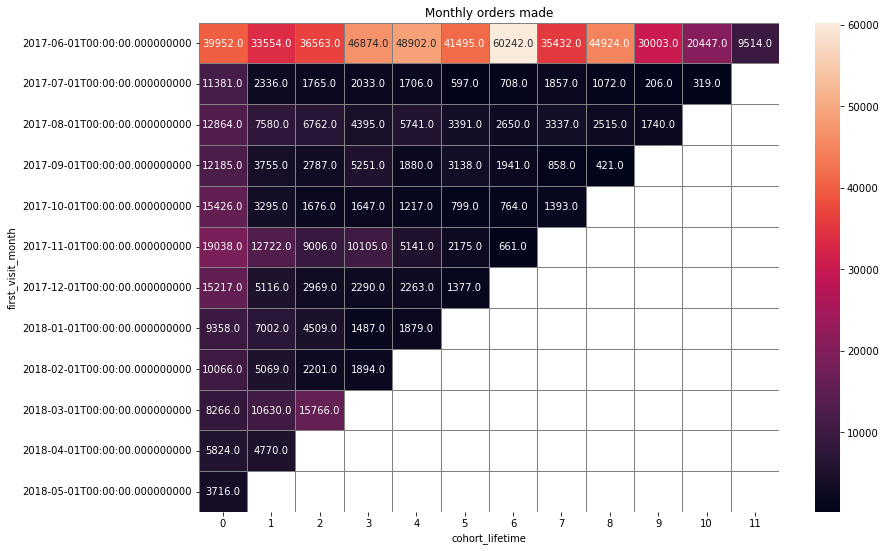

In [546]:
plt.figure(figsize=(13, 9))
plt.title('Monthly orders made')
sns.heatmap(
    monthly_order_cohort,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray'
) 

Cohort with first visit on month of Jun2017 contributes to most of the orderse and is also active for almost  
10 months .No other cohorts has as many orders as the one on June2017..Also most of the order comes during the months of Nov/Dec 2017.

#### What is the average purchase size?

In [547]:
monthly_revenue_cohort=orders_df.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='revenue',aggfunc='mean')

In [548]:
monthly_revenue_cohort

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,9.107273,10.241115,8.179090,10.968695,8.813644,6.518857,9.033775,7.526564,6.665545,8.372849,12.133556,10.300983
2017-07-01,5.770424,7.390111,7.598742,5.219523,7.067714,4.225126,8.830480,9.943398,14.752229,24.618738,4.859436,NaN
2017-08-01,13.068870,18.059620,5.968480,9.083363,9.587337,8.920970,6.516581,10.732622,3.967427,6.060695,NaN,NaN
2017-09-01,10.124081,17.226740,17.054478,149.403740,33.453005,33.728075,12.634626,14.382960,9.149691,NaN,NaN,NaN
2017-10-01,5.640309,10.200753,6.676778,9.811014,5.420551,6.209011,4.415052,5.841579,NaN,NaN,NaN,NaN
2017-11-01,3.895988,4.111325,5.201341,4.375082,3.686032,3.437228,4.818290,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.526378,4.327936,15.229057,21.350729,7.597424,11.028214,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.916028,5.401572,10.684052,4.203853,2.775737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.026598,4.596540,5.292903,3.425993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Average purchase size'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

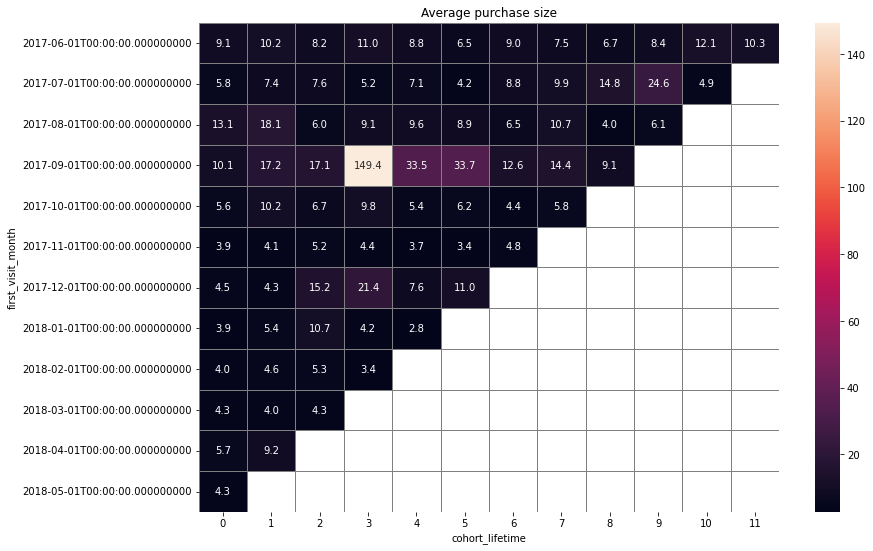

In [549]:
plt.figure(figsize=(13, 9))
plt.title('Average purchase size')
sns.heatmap(
    monthly_revenue_cohort,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

***Conclusion***  
Though Jun2017 cohort contributes to most number of orders , it is lower on the revenue side. The Sep2017 cohort  
shows generally increased purchase size with a spike of around 100..

[Back to Contents](#back)

### How much money do they bring? (LTV)
### When they pay off

In [550]:
first_orders = orders_df.groupby('uid').agg({'monthly': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_month']
first_orders.head() 

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [551]:
#using month when first order placed 'first_buy_month' as cohort.
cohort_sizes = first_orders.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [552]:
orders_ = pd.merge(orders_df,first_orders, on='uid')
orders_.head() 

,Unnamed: 0_x,buy_ts,revenue,uid,first_buy_date,first_buy_month_x,Unnamed: 0_y,device,end_ts,source_id,...,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime,first_buy_month_y
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,...,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:02:00,2,0,2017-06-01
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,...,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:11:00,11,0,2017-06-01
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,...,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:09:00,9,0,2017-06-01
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,...,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:19:00,19,0,2017-06-01
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,...,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:28:00,28,0,2017-06-01


In [553]:
cohorts = orders_df.groupby(['first_buy_month','monthly']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_buy_month,monthly,revenue
0,2017-06-01,2017-06-01,148121.29
1,2017-06-01,2017-07-01,155869.55
2,2017-06-01,2017-08-01,114898.83
3,2017-06-01,2017-09-01,374481.76
4,2017-06-01,2017-10-01,351833.14


In [554]:
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report.head() 

,first_buy_month,n_buyers,monthly,revenue
0,2017-06-01,2023,2017-06-01,148121.29
1,2017-06-01,2023,2017-07-01,155869.55
2,2017-06-01,2023,2017-08-01,114898.83
3,2017-06-01,2023,2017-09-01,374481.76
4,2017-06-01,2023,2017-10-01,351833.14


In [555]:
#Considering margin rate to be 0.5%
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['monthly'] - report['first_buy_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_buy_month,n_buyers,monthly,revenue,gp,age
0,2017-06-01,2023,2017-06-01,148121.29,74060.645,0
1,2017-06-01,2023,2017-07-01,155869.55,77934.775,1
2,2017-06-01,2023,2017-08-01,114898.83,57449.415,2
3,2017-06-01,2023,2017-09-01,374481.76,187240.880,3
4,2017-06-01,2023,2017-10-01,351833.14,175916.570,4


In [556]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_buy_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,37.0,39.0,28.0,93.0,87.0,55.0,89.0,51.0,62.0,53.0,55.0,24.0
2017-07-01,26.0,13.0,39.0,14.0,5.0,6.0,3.0,4.0,7.0,10.0,7.0,
2017-08-01,17.0,15.0,13.0,16.0,25.0,12.0,8.0,18.0,8.0,6.0,,
2017-09-01,33.0,30.0,11.0,159.0,19.0,24.0,32.0,11.0,6.0,,,
2017-10-01,10.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,,,,
2017-11-01,14.0,10.0,5.0,10.0,4.0,1.0,3.0,,,,,
2017-12-01,9.0,4.0,8.0,7.0,3.0,2.0,,,,,,
2018-01-01,9.0,6.0,8.0,2.0,1.0,,,,,,,
2018-02-01,6.0,3.0,1.0,1.0,,,,,,,,


In [557]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

673.0

In [558]:
cohort_201706= report[report['first_buy_month'] == '2017-06-01']

# calculating costs for the cohort month
costs_201706=costs_df[costs_df['monthly'] == '2017-06-01']['costs'].sum()

n_buyers_201706= cohort_201706['n_buyers'][0]
cac_201706= costs_201706/ n_buyers_201706
ltv_201706= output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344043
LTV = 673.0


In [559]:
# calculating the costs per month
monthly_costs = costs_df.groupby('monthly').sum()
monthly_costs.head() 



,Unnamed: 0,costs
monthly,,
2017-06-01,231795,18015.00
2017-07-01,246140,18240.59
2017-08-01,252867,14790.54
2017-09-01,251115,24368.91
2017-10-01,266104,36322.88


In [560]:
report_ = pd.merge(report, monthly_costs, left_on='first_buy_month', right_on='monthly')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.loc[40:50] 

,first_buy_month,n_buyers,monthly,revenue,gp,age,ltv,Unnamed: 0,costs,cac
40,2017-09-01,2581,2018-04-01,57471.87,28735.935,7,11.133644,251115,24368.91,9.441654
41,2017-09-01,2581,2018-05-01,28992.16,14496.080,8,5.616459,251115,24368.91,9.441654
42,2017-10-01,4340,2017-10-01,90862.84,45431.420,0,10.468069,266104,36322.88,8.369327
43,2017-10-01,4340,2017-11-01,37716.49,18858.245,1,4.345218,266104,36322.88,8.369327
44,2017-10-01,4340,2017-12-01,12986.03,6493.015,2,1.496086,266104,36322.88,8.369327
45,2017-10-01,4340,2018-01-01,14660.09,7330.045,3,1.688950,266104,36322.88,8.369327
46,2017-10-01,4340,2018-02-01,11127.24,5563.620,4,1.281940,266104,36322.88,8.369327
47,2017-10-01,4340,2018-03-01,9848.11,4924.055,5,1.134575,266104,36322.88,8.369327
48,2017-10-01,4340,2018-04-01,9951.88,4975.940,6,1.146530,266104,36322.88,8.369327
49,2017-10-01,4340,2018-05-01,12321.68,6160.840,7,1.419548,266104,36322.88,8.369327


***Conclusion***  
Studying the above report shows that , users who first visited by the month of June/July/Aug 2017 contributed   
for more revenue.The records show that they had pretty high ltv which was higher than cac thus ending up in  
more profit..Users who first visited by Oct/Nov 2017 started showing decrease in revenue as well as poor ltv (lesser than cac)leading to situations for loss .. This trend continues for all other upcoming cohorts too..  
Less lifetime could be a reason for this trend.

In [561]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_buy_month', columns='age', values='romi', aggfunc='mean'
)

output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.111054,4.326105,3.188977,10.393610,9.765005,6.133283,10.011412,5.714312,6.932368,5.924286,6.207000,2.720054
2017-07-01,2.689543,1.362941,4.119299,1.459328,0.550589,0.658855,0.330236,0.430434,0.777347,1.040600,0.712882,NaN
2017-08-01,1.586876,1.409796,1.201217,1.437202,2.274979,1.074252,0.763761,1.692156,0.742485,0.521054,NaN,NaN
2017-09-01,3.529658,3.201266,1.200844,16.804693,2.000516,2.550682,3.411353,1.179205,0.594860,NaN,NaN,NaN
2017-10-01,1.250766,0.519184,0.178758,0.201802,0.153171,0.135563,0.136992,0.169613,NaN,NaN,NaN,NaN
2017-11-01,1.558679,1.122545,0.548361,1.099075,0.387179,0.059181,0.359425,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.990657,0.484160,0.946487,0.813868,0.304798,0.277822,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.951462,0.617431,0.796671,0.214607,0.125235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.715507,0.387177,0.152960,0.110036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
output.cumsum(axis=1).round(2) 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.11,8.44,11.63,22.02,31.78,37.92,47.93,53.64,60.58,66.50,72.71,75.43
2017-07-01,2.69,4.05,8.17,9.63,10.18,10.84,11.17,11.60,12.38,13.42,14.13,NaN
2017-08-01,1.59,3.00,4.20,5.64,7.91,8.98,9.75,11.44,12.18,12.70,NaN,NaN
2017-09-01,3.53,6.73,7.93,24.74,26.74,29.29,32.70,33.88,34.47,NaN,NaN,NaN
2017-10-01,1.25,1.77,1.95,2.15,2.30,2.44,2.58,2.75,NaN,NaN,NaN,NaN
2017-11-01,1.56,2.68,3.23,4.33,4.72,4.78,5.13,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.99,1.47,2.42,3.24,3.54,3.82,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.95,1.57,2.37,2.58,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.72,1.10,1.26,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Conclusion - ROMI***

June cohort is the highly profit making one which started adding more revenue gradually from its early lifetime.  
Nearly 6 cohorts of the 2017 were able to payoff right from the 0th lifetime and are increasing revenue   
gradually..Though the cohorts in 2018 are not as much profit generating as the earlier ones , they are close to pay-off in their first month of lifetime..So most cohorts payoff within first 60 days ...

[Back to Contents](#back)

### Marketing

    How much money was spent? Overall/per source/over time
    

In [563]:
costs_df

,Unnamed: 0,source_id,dt,costs,monthly
0,0,1,2017-06-01,75.20,2017-06-01
1,1,1,2017-06-02,62.25,2017-06-01
2,2,1,2017-06-03,36.53,2017-06-01
3,3,1,2017-06-04,55.00,2017-06-01
4,4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...
2537,2537,10,2018-05-27,9.92,2018-05-01
2538,2538,10,2018-05-28,21.26,2018-05-01
2539,2539,10,2018-05-29,11.32,2018-05-01
2540,2540,10,2018-05-30,33.15,2018-05-01


Costs per source

In [564]:
costs_per_source=costs_df.groupby(['source_id']).agg({'costs':'sum'}).reset_index()

In [565]:
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [566]:
costs_per_source_monthly=costs_df.groupby(['monthly','source_id']).agg({'costs':'sum'}).reset_index()

In [567]:
costs_per_source_monthly

,monthly,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


overall costs 

In [568]:
costs_overall=costs_df['costs'].sum()

In [569]:
costs_overall

329131.62

In [570]:
costs_df['monthly']=costs_df['dt'].astype('datetime64[M]')

In [571]:
costs_monthly_df=costs_df[['source_id','costs','monthly']]

In [572]:
costs_monthly_df

,source_id,costs,monthly
0,1,75.20,2017-06-01
1,1,62.25,2017-06-01
2,1,36.53,2017-06-01
3,1,55.00,2017-06-01
4,1,57.08,2017-06-01
...,...,...,...
2537,10,9.92,2018-05-01
2538,10,21.26,2018-05-01
2539,10,11.32,2018-05-01
2540,10,33.15,2018-05-01


Costs spent over time(monthly)

In [573]:
cost_monthly_grouped=costs_df.groupby(['source_id','monthly'])['costs'].sum().reset_index()

In [574]:
cost_monthly_grouped

,source_id,monthly,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [575]:
costs_over_time=costs_df.groupby('monthly').agg({'costs':'sum'})

In [576]:
costs_over_time

,costs
monthly,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [577]:
orders_df

,Unnamed: 0_x,buy_ts,revenue,uid,first_buy_date,first_buy_month,Unnamed: 0_y,device,end_ts,source_id,...,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:02:00,2,0
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:11:00,11,0
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:09:00,9,0
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:19:00,19,0
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:28:00,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,121449,desktop,2018-01-15 10:47:00,4,...,2018-01-15,2017-10-01,2018,1,3,2018-01-15,2018,0 days 00:08:00,8,0
761803,50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,232151,desktop,2017-12-12 16:21:00,5,...,2017-12-12,2017-10-01,2017,12,50,2017-12-12,2017,0 days 00:01:00,1,0
761804,50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,266555,desktop,2017-10-23 12:36:00,3,...,2017-10-23,2017-10-01,2017,10,43,2017-10-23,2017,0 days 00:04:00,4,0
761805,50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,342729,desktop,2017-11-15 17:18:00,4,...,2017-11-15,2017-10-01,2017,11,46,2017-11-15,2017,0 days 00:10:00,10,0


[Back to Contents](#back)

***How much did customer acquisition from each of the sources cost?***

In [578]:
orders_temp_df=orders_df[(orders_df['buy_ts']<=orders_df['end_ts']) & (orders_df['buy_ts'] >= orders_df['start_ts'])]

In [579]:
orders_temp_df

,Unnamed: 0_x,buy_ts,revenue,uid,first_buy_date,first_buy_month,Unnamed: 0_y,device,end_ts,source_id,...,daily,first_visit_month,session_year,session_month,session_week,session_date,year,session_length,session_length_min,cohort_lifetime
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:02:00,2,0
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:11:00,11,0
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:09:00,9,0
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:19:00,19,0
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,...,2017-06-01,2017-06-01,2017,6,22,2017-06-01,2017,0 days 00:28:00,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761790,50408,2018-05-31 23:42:00,0.92,15854392578508828030,2018-05-31 23:42:00,2018-05-01,331681,touch,2018-05-31 23:47:00,4,...,2018-05-31,2018-05-01,2018,5,22,2018-05-31,2018,0 days 00:21:00,21,0
761798,50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,43215,desktop,2018-06-01 00:13:00,4,...,2018-05-31,2018-05-01,2018,5,22,2018-05-31,2018,0 days 00:27:00,27,0
761800,50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,129697,desktop,2018-05-31 23:55:00,10,...,2018-05-31,2018-05-01,2018,5,22,2018-05-31,2018,0 days 00:50:00,50,0
761801,50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,139217,desktop,2018-05-31 23:55:00,3,...,2018-05-31,2018-05-01,2018,5,22,2018-05-31,2018,0 days 00:03:00,3,0


In [580]:
#buyers_count_df=orders_temp_df.groupby(['source_id','monthly'])['buy_ts'].count().reset_index()
buyers_count_df=orders_temp_df.groupby(['source_id','monthly']).agg({'buy_ts':'count',
                                                                     'revenue':'sum'}).reset_index()


In [581]:
buyers_count_df

,source_id,monthly,buy_ts,revenue
0,1,2017-06-01,270,1264.19
1,1,2017-07-01,265,1702.28
2,1,2017-08-01,181,1002.10
3,1,2017-09-01,368,2191.52
4,1,2017-10-01,553,2957.53
...,...,...,...,...
112,10,2018-02-01,116,281.18
113,10,2018-03-01,141,386.81
114,10,2018-04-01,95,217.04
115,10,2018-05-01,106,351.98


In [582]:
buyers_count_df=buyers_count_df.rename(columns={'buy_ts':'n_buyers'})

In [583]:
#considering margin rate 0.5%
buyers_count_df['gp']=buyers_count_df['revenue']*0.5

In [584]:
buyers_count_df

,source_id,monthly,n_buyers,revenue,gp
0,1,2017-06-01,270,1264.19,632.095
1,1,2017-07-01,265,1702.28,851.140
2,1,2017-08-01,181,1002.10,501.050
3,1,2017-09-01,368,2191.52,1095.760
4,1,2017-10-01,553,2957.53,1478.765
...,...,...,...,...,...
112,10,2018-02-01,116,281.18,140.590
113,10,2018-03-01,141,386.81,193.405
114,10,2018-04-01,95,217.04,108.520
115,10,2018-05-01,106,351.98,175.990


In [585]:
buyers_count_df.isna().sum()

source_id    0
monthly      0
n_buyers     0
revenue      0
gp           0
dtype: int64

In [586]:
buyers_count_df=buyers_count_df[~buyers_count_df['n_buyers'].isna()]

In [587]:
#order_cost_df=pd.merge(orders_temp_df,costs_monthly_df,on=['source_id','monthly'])
cost_acquisition_df=pd.merge(buyers_count_df,cost_monthly_grouped,on=['source_id','monthly'])

In [588]:
cost_acquisition_df

,source_id,monthly,n_buyers,revenue,gp,costs
0,1,2017-06-01,270,1264.19,632.095,1125.61
1,1,2017-07-01,265,1702.28,851.140,1072.88
2,1,2017-08-01,181,1002.10,501.050,951.81
3,1,2017-09-01,368,2191.52,1095.760,1502.01
4,1,2017-10-01,553,2957.53,1478.765,2315.75
...,...,...,...,...,...,...
79,10,2018-01-01,78,230.12,115.060,614.35
80,10,2018-02-01,116,281.18,140.590,480.88
81,10,2018-03-01,141,386.81,193.405,526.41
82,10,2018-04-01,95,217.04,108.520,388.25


In [589]:
cost_acquisition_df['cac'] = cost_acquisition_df['costs']/cost_acquisition_df['n_buyers']

In [590]:
cost_acquisition_df['ltv'] = cost_acquisition_df['gp']/cost_acquisition_df['n_buyers']

In [591]:
cost_acquisition_df

,source_id,monthly,n_buyers,revenue,gp,costs,cac,ltv
0,1,2017-06-01,270,1264.19,632.095,1125.61,4.168926,2.341093
1,1,2017-07-01,265,1702.28,851.140,1072.88,4.048604,3.211849
2,1,2017-08-01,181,1002.10,501.050,951.81,5.258619,2.768232
3,1,2017-09-01,368,2191.52,1095.760,1502.01,4.081549,2.977609
4,1,2017-10-01,553,2957.53,1478.765,2315.75,4.187613,2.674078
...,...,...,...,...,...,...,...,...
79,10,2018-01-01,78,230.12,115.060,614.35,7.876282,1.475128
80,10,2018-02-01,116,281.18,140.590,480.88,4.145517,1.211983
81,10,2018-03-01,141,386.81,193.405,526.41,3.733404,1.371667
82,10,2018-04-01,95,217.04,108.520,388.25,4.086842,1.142316


In [592]:
cost_acquisition_df['cac'].describe()

count    84.000000
mean      8.469054
std       4.662986
min       3.201933
25%       5.485268
50%       7.183696
75%       9.808601
max      22.421679
Name: cac, dtype: float64

In [593]:
cost_acquisition_pivot_cac=cost_acquisition_df.pivot_table(index='source_id',columns='monthly',values='cac')

In [594]:
cost_acquisition_pivot_ltv=cost_acquisition_df.pivot_table(index='source_id',columns='monthly',values='ltv')

In [595]:
cost_acquisition_pivot_cac

monthly,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,4.168926,4.048604,5.258619,4.081549,4.187613,3.995359,3.397968,4.631737,4.280544,3.518755,3.892933,3.320385
2,9.556614,10.143957,11.993709,9.725277,8.922652,9.976578,8.095537,9.946746,9.877130,8.704503,10.394792,5.603000
3,14.083151,19.428785,22.421679,18.017269,17.722117,19.303107,16.601351,19.824337,17.019809,18.269344,21.620488,15.764523
4,9.499459,8.505373,10.688904,10.384520,6.350979,5.298741,6.427172,6.423778,6.168423,6.728973,7.886386,6.564190
5,6.475545,6.752568,6.315838,6.138979,5.891113,9.497508,7.747388,8.353841,6.881018,6.680855,7.355357,5.509850
9,5.592549,7.379024,5.411522,7.421786,6.348021,5.940696,8.435641,7.599444,8.617188,3.201933,12.048065,8.623095
10,3.530562,7.852857,6.120263,6.979848,3.465414,7.012035,9.785758,7.876282,4.145517,3.733404,4.086842,3.866604


***Conclusion***   
    The above table shows that the cost spent for source_id  3 is comparitively higher for almost all the months averaging around 18-19 followed by   
source 2.Cost for source_id 1 is on the lower side compared to all other sources.

[Back to Contents](#back)

#### Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.


##### Monthly people visits for various devices

In [596]:
monthly_pivot_device=visits_df.groupby(['monthly','device'])['uid'].nunique().reset_index()

In [597]:
monthly_pivot_device.head()

,monthly,device,uid
0,2017-06-01,desktop,9761
1,2017-06-01,touch,3655
2,2017-07-01,desktop,10145
3,2017-07-01,touch,4223
4,2017-08-01,desktop,8611


In [598]:
monthly_pivot_device_Desktop = monthly_pivot_device[monthly_pivot_device['device']=='desktop']

In [599]:
monthly_pivot_device_Desktop['monthly']=monthly_pivot_device_Desktop['monthly'].dt.strftime('%m-%Y')

In [600]:
monthly_pivot_device_Touch = monthly_pivot_device[monthly_pivot_device['device']=='touch']

In [601]:
monthly_pivot_device_Touch['monthly']=monthly_pivot_device_Touch['monthly'].dt.strftime('%m-%Y')

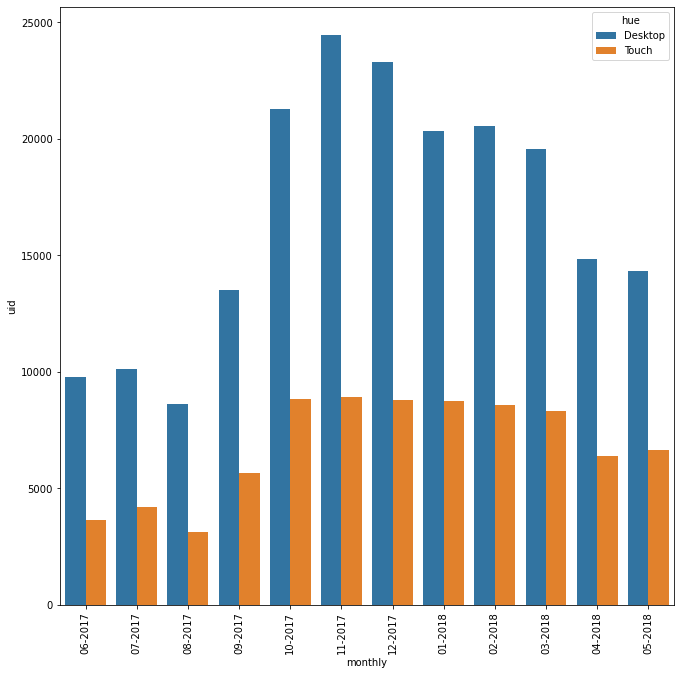

In [602]:
plt.figure(figsize=(11,11))

monthly_pivot_device_Desktop['hue']='Desktop'
monthly_pivot_device_Touch['hue']='Touch'
res=pd.concat([monthly_pivot_device_Desktop,monthly_pivot_device_Touch])

sns.barplot(x='monthly',y='uid',data=res,hue='hue')
plt.xticks(rotation=90)

plt.show()


<a id='back'></a>

##### Monthly sessions for various devices

In [603]:
monthly_session_device=visits_df.groupby(['monthly','device']).agg({'start_ts':'count'}).reset_index()

In [604]:
monthly_session_device['monthly']=monthly_session_device['monthly'].dt.strftime('%m-%Y')

In [605]:
monthly_session_device=monthly_session_device.rename(columns={'start_ts':'Number of sessions'})

In [606]:
monthly_session_device.head()

,monthly,device,Number of sessions
0,06-2017,desktop,12358
1,06-2017,touch,4147
2,07-2017,desktop,12950
3,07-2017,touch,4878
4,08-2017,desktop,10854


In [607]:
monthly_session_Desktop = monthly_session_device[monthly_session_device['device']=='desktop']

In [608]:
monthly_session_Touch = monthly_session_device[monthly_session_device['device']=='touch']

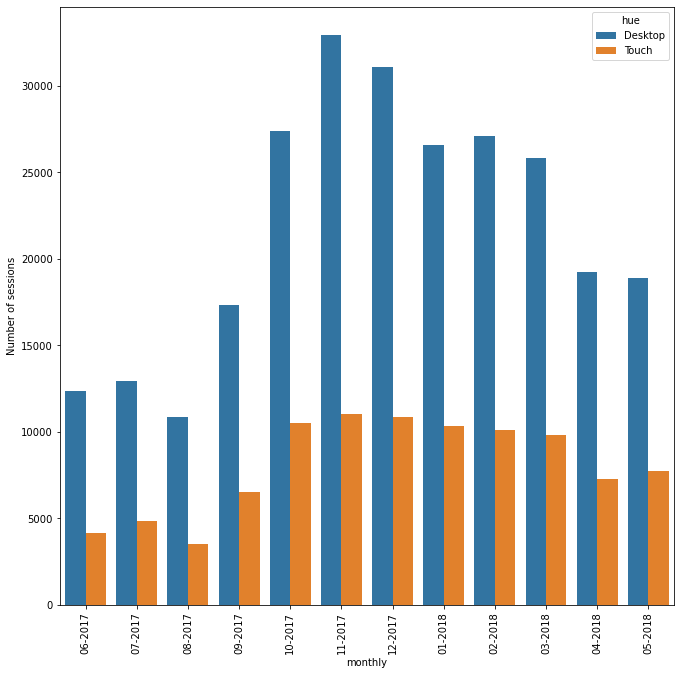

In [609]:
plt.figure(figsize=(11,11))

monthly_session_Desktop['hue']='Desktop'
monthly_session_Touch['hue']='Touch'
res=pd.concat([monthly_session_Desktop,monthly_session_Touch])

sns.barplot(x='monthly',y='Number of sessions',data=res,hue='hue')
plt.xticks(rotation=90)

plt.show()

When looking on monthly visits and sessions , Desktop contributes more than touch devices..

[Back to Contents](#back)

##### Monthly people visits for various sources

In [610]:
monthly_visits_source=visits_df.groupby(['monthly','source_id'])['uid'].nunique().reset_index()

In [611]:
monthly_visits_source=monthly_visits_source.rename(columns={'uid':'Number of people visits'})

In [612]:
monthly_visits_source['monthly']=monthly_visits_source['monthly'].dt.strftime('%m-%Y')

In [613]:
monthly_visits_source_1 = monthly_visits_source[monthly_visits_source['source_id']==1]

In [614]:
monthly_visits_source_2 = monthly_visits_source[monthly_visits_source['source_id']==2]

In [615]:
monthly_visits_source_3 = monthly_visits_source[monthly_visits_source['source_id']==3]

In [616]:
monthly_visits_source_4= monthly_visits_source[monthly_visits_source['source_id']==4]

In [617]:
monthly_visits_source_5 = monthly_visits_source[monthly_visits_source['source_id']==5]

In [618]:
monthly_visits_source_9 = monthly_visits_source[monthly_visits_source['source_id']==9]

In [619]:
monthly_visits_source_10 = monthly_visits_source[monthly_visits_source['source_id']==10]

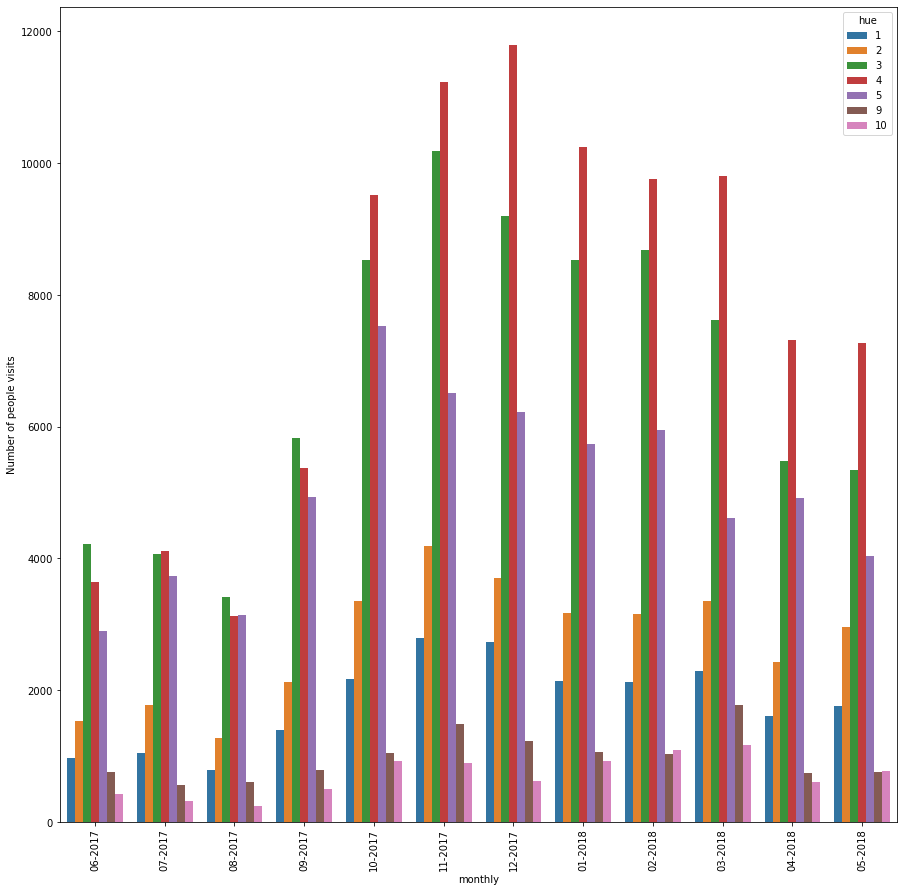

In [620]:
plt.figure(figsize=(15,15))

monthly_visits_source_1['hue']=1
monthly_visits_source_2['hue']=2
monthly_visits_source_3['hue']=3
monthly_visits_source_4['hue']=4
monthly_visits_source_5['hue']=5
monthly_visits_source_9['hue']=9
monthly_visits_source_10['hue']=10
res=pd.concat([monthly_visits_source_1,monthly_visits_source_2,monthly_visits_source_3,monthly_visits_source_4,
               monthly_visits_source_5,monthly_visits_source_9,monthly_visits_source_10])

sns.barplot(x='monthly',y='Number of people visits',data=res,hue='hue')
plt.xticks(rotation=90)

plt.show()

Source 4 and 3 has contributed for most of the visits happening monthly..  

# Conclusion:  

  1.The users who joined by Jun2017 has been consistently active throughout the lifetime making orders though  
   the revenue is not very high ...  
  2.Desktop seems to be the most used device compared to touchscreen.  
  3.Source 3 and 4 directs more users compared to other sources..
  4.Though there is profit initially ,it has started decreasing in the later months of 2017 and is getting bad  
    with 2018.  
    Steps should be taken to increase active users and revenue to prevent loss.

[Back to Contents](#back)